# Problem set 02B
We import the packages for the exercises 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
Create a function to charge the data set 'mnist1.5k.csv' and return a matrix of 784 columns with the vectorized images and a vector with the labels

In [2]:
def load_mnist():
    mnist = np.loadtxt("data.csv",delimiter=",")
    d = mnist[:,1:785]
    c = mnist[:,0]
    return d,c

We charge the function to show the data

In [3]:
def show_sample_mnist(d,c):
    perm = np.random.permutation(range(d.shape[0]))[0:50]
    random_imgs   = d[perm]
    random_labels = c[perm] 
    fig = plt.figure(figsize=(10,6))
    for i in range(random_imgs.shape[0]):
        ax=fig.add_subplot(5,10,i+1)
        plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
        ax.set_title(int(random_labels[i]))
        ax.set_xticklabels([])
        ax.set_yticklabels([])

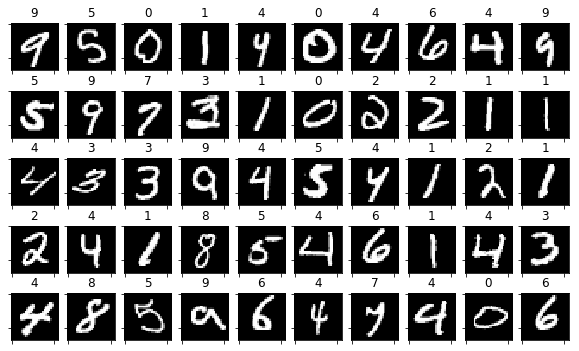

In [4]:
d,c = load_mnist()
show_sample_mnist(d,c)

## Exercise 2
Now we want do a comvolution of the image with a filter f, so create a function that recive the matrix of the images and the filter and return the result matix after apply the filter

In [5]:
from scipy.signal import convolve2d
def convolve_mnist(d,f):
    r = np.copy(d)
    for i in range(d.shape[0]):
        tem = d[i].reshape(28,28)
        r[i] = convolve2d(tem,f,mode="same").ravel()
    return r

In [6]:
def convolve_mnist2(d,f):
    r = convolve2d(d,f,mode="same")
    return r

We use the function [convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html) for apply the filter present on the scipy.signal package. And now we prove the solution

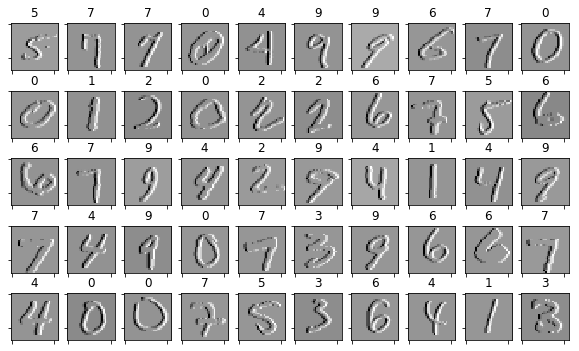

In [7]:
f = np.array([[-1,1]])
dc = convolve_mnist(d,f)
show_sample_mnist(dc,c)

## Exercise 3
Create a fucntion that recive: 
* a matrix d m x n with the data 
* a vector c with the clases of the data
* a sorter "sklearn"
* a percentage of data for test 
and do:
* divide d and c on train and test sets
* fit the sorter
* measure and return the performance of the sorter 

Import the libraries to use

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 

/home/lotalorafox/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Create a fit funtion

In [9]:
def classify(d,c, classifier, test_size=0.2):
    d_train,d_test, c_train, c_test = cross_validation.train_test_split(d, c, test_size=test_size, random_state=np.random.randint(1,100))
    classifier.fit(d_train,c_train)
    score = classifier.score(d_test, c_test)
    return score

Prove the model and the function

In [10]:
#from sklearn.naive_bayes import GaussianNB
d,c = load_mnist()
classify(d,c,GaussianNB())

0.6033333333333334

## Exercise 4 
Now we create a function that call the last one  n times and return the averaga and standar standard deviation of the model's performance.

In [11]:
def classify_avg(d,c,classifier,repeat=10, test_size=0.2):
    values = np.ones((repeat))
    for i in range(repeat):
        values[i] = classify(d,c, classifier, test_size)
    mean_performance = np.mean(values)
    std_performance  = np.std(values)
    return mean_performance, std_performance

And prove the model

In [12]:
from sklearn.naive_bayes import GaussianNB
classify_avg(d,c,GaussianNB())

(0.5940000000000001, 0.029694743268426787)

## Exercise 5
Now create a function that fit a model with a DecisionTreeClassifier and a GaussianNB and return the average and std of the models. 
[DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
[GaussianNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
def NBDT_MNIST():
    d,c = load_mnist()
    g1 = GaussianNB()
    g2 = DecisionTreeClassifier()
    meanNB, stdNB = classify_avg(d,c,g1)
    meanDT, stdDT = classify_avg(d,c,g2)
    return meanNB, stdNB, meanDT, stdDT

And we prove the model

In [14]:
meanNB, stdNB, meanDT, stdDT = NBDT_MNIST()
print ("Gaussian      %.3f (+/- %.3f)"%(meanNB, stdNB))
print ("Decision Tree %.3f (+/- %.3f)"%(meanDT, stdDT))

Gaussian      0.594 (+/- 0.024)
Decision Tree 0.683 (+/- 0.022)


## Exercise 6
Create a similar funtion to the 5 exercise but in this case do a convolution with a filter in the data.

In [15]:
def NBDT_MNIST_convolution1():

    d,c = load_mnist()
    f   = np.array([[-1,1]])
    dc  = convolve_mnist(d,f)
    g1 = GaussianNB()
    g2 = DecisionTreeClassifier()
    meanNB, stdNB = classify_avg(dc,c,g1)
    meanDT, stdDT = classify_avg(dc,c,g2)
    return meanNB, stdNB, meanDT, stdDT

And prove the funtion

In [16]:
meanNB, stdNB, meanDT, stdDT = NBDT_MNIST_convolution1()
print ("Gaussian      %.3f (+/- %.3f)"%(meanNB, stdNB))
print ("Decision Tree %.3f (+/- %.3f)"%(meanDT, stdDT))

Gaussian      0.570 (+/- 0.039)
Decision Tree 0.496 (+/- 0.032)


## Exercise 7
Now we change the filter to a 4 x 4 matrix full of ones

In [17]:
def NBDT_MNIST_convolution2():
    d,c = load_mnist()
    f   = np.ones((4,4))
    dc  = convolve_mnist(d,f)
    g1 = GaussianNB()
    g2 = DecisionTreeClassifier()
    meanNB, stdNB = classify_avg(d,c,g1)
    meanDT, stdDT = classify_avg(d,c,g2)
    
    return meanNB, stdNB, meanDT, stdDT

Prove the funtion

In [18]:
meanNB, stdNB, meanDT, stdDT = NBDT_MNIST_convolution2()
print ("Gaussian      %.3f (+/- %.3f)"%(meanNB, stdNB))
print ("Decision Tree %.3f (+/- %.3f)"%(meanDT, stdDT))

Gaussian      0.617 (+/- 0.030)
Decision Tree 0.689 (+/- 0.026)


We can see what the filter do

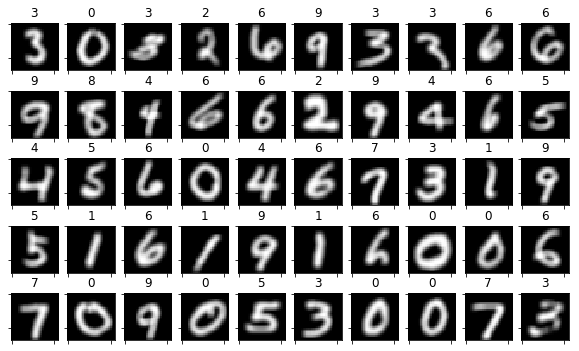

In [19]:
d,c = load_mnist()
f = np.ones((4,4))
dc = convolve_mnist(d,f)
show_sample_mnist(dc,c)

## Exercise 8
We create a similar funtion to the last exercisebut now we discretize the images 

In [20]:
def NBDT_MNIST_convolution3():

    d,c = load_mnist()
    d[d>=1] = 1
    f   = np.ones((4,4))
    dc  = convolve_mnist(d,f)
    g1 = GaussianNB()
    g2 = DecisionTreeClassifier()
    meanNB, stdNB = classify_avg(d,c,g1)
    meanDT, stdDT = classify_avg(d,c,g2)

    return meanNB, stdNB, meanDT, stdDT

prove the function

In [21]:
meanNB, stdNB, meanDT, stdDT = NBDT_MNIST_convolution3()
print ("Gaussian      %.3f (+/- %.3f)"%(meanNB, stdNB))
print ("Decision Tree %.3f (+/- %.3f)"%(meanDT, stdDT))

Gaussian      0.587 (+/- 0.028)
Decision Tree 0.703 (+/- 0.027)


And we can see the data after discretize the images

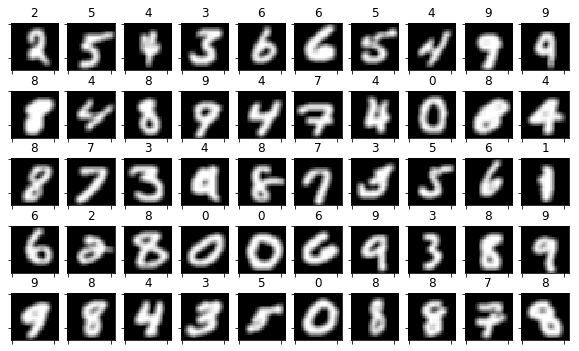

In [22]:
d,c = load_mnist()
f   = np.ones((4,4))
dc = np.copy(d)
dc[dc>=1] = 1
dc  = convolve_mnist(dc,f)
show_sample_mnist(dc,c)

## End
### thanks